## Support Vector Machine


### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import scale
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
import seaborn as sns


### Loading the data

In [2]:
data = pd.read_csv('/Users/amarjotsinghlohia/Documents/Dissertation/Data/home-credit-default-risk/application_train_upsampled.csv')

## Splitting of data into Target and non_target

In [3]:
X = data.iloc[:,3:]
y = data['TARGET']
print(X.shape, y.shape)

(336226, 57) (336226,)


### Training and Test Splitting

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

### Scaling
Here we are going to use scaling of the dataset for better prediction. Scaling normalizes the data to prroduce mean as 1 and standard deviation as 0. This helps the model to execute faster and more efficiently.

In [5]:
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

## Model

In [6]:
classifier_svm = SGDClassifier(verbose = 10)
classifier_svm.fit(X_train_scaled, y_train)

-- Epoch 1
Norm: 22.65, NNZs: 57, Bias: 0.051195, T: 252169, Avg. loss: 3.443944
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 11.55, NNZs: 57, Bias: -0.048817, T: 504338, Avg. loss: 1.159291
Total training time: 0.21 seconds.
-- Epoch 3
Norm: 7.94, NNZs: 57, Bias: 0.081720, T: 756507, Avg. loss: 1.023711
Total training time: 0.33 seconds.
-- Epoch 4
Norm: 6.09, NNZs: 57, Bias: -0.169523, T: 1008676, Avg. loss: 0.971360
Total training time: 0.42 seconds.
-- Epoch 5
Norm: 4.99, NNZs: 57, Bias: -0.143146, T: 1260845, Avg. loss: 0.939654
Total training time: 0.52 seconds.
-- Epoch 6
Norm: 4.46, NNZs: 57, Bias: -0.078672, T: 1513014, Avg. loss: 0.922489
Total training time: 0.61 seconds.
-- Epoch 7
Norm: 3.98, NNZs: 57, Bias: 0.087221, T: 1765183, Avg. loss: 0.909336
Total training time: 0.72 seconds.
-- Epoch 8
Norm: 3.54, NNZs: 57, Bias: 0.014222, T: 2017352, Avg. loss: 0.900962
Total training time: 0.81 seconds.
-- Epoch 9
Norm: 3.31, NNZs: 57, Bias: 0.032447, T: 2269521, Avg. los

SGDClassifier(verbose=10)

## Confusion Matrix

/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


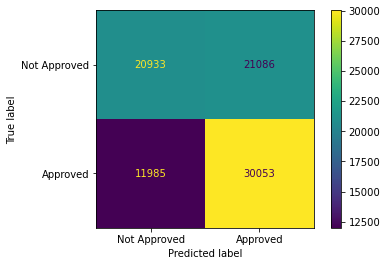

In [7]:
plot_confusion_matrix(classifier_svm, X_test_scaled, y_test, values_format ='d', display_labels = ['Not Approved','Approved'])

In [8]:
#prediction
y_pred = classifier_svm.predict(X_test)
print(classification_report(y_pred,y_test))


/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.87      0.52      0.65     69617
           1       0.21      0.62      0.32     14440

    accuracy                           0.54     84057
   macro avg       0.54      0.57      0.49     84057
weighted avg       0.76      0.54      0.60     84057



## Using GridSearchCV for Cross Validation

In [12]:
param_grid = {'loss': ['log_loss', 'squared_error'], 
              'penalty': ['l1', 'l2', 'elasticnet'], 
              'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 
              'max_iter': [1000, 10000, 100000], 
              'tol': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}

optimal_params = GridSearchCV(SGDClassifier(), param_grid, cv = 5, verbose = 10, n_jobs = -1)

optimal_params.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
[CV 1/5; 1/1152] START alpha=0.0001, loss=log_loss, max_iter=1000, penalty=l1, tol=0.0001
[CV 2/5; 1/1152] START alpha=0.0001, loss=log_loss, max_iter=1000, penalty=l1, tol=0.0001
[CV 3/5; 1/1152] START alpha=0.0001, loss=log_loss, max_iter=1000, penalty=l1, tol=0.0001
[CV 4/5; 1/1152] START alpha=0.0001, loss=log_loss, max_iter=1000, penalty=l1, tol=0.0001
[CV 4/5; 1/1152] END alpha=0.0001, loss=log_loss, max_iter=1000, penalty=l1, tol=0.0001;, score=0.615 total time=  22.4s
[CV 5/5; 1/1152] START alpha=0.0001, loss=log_loss, max_iter=1000, penalty=l1, tol=0.0001
[CV 2/5; 1/1152] END alpha=0.0001, loss=log_loss, max_iter=1000, penalty=l1, tol=0.0001;, score=0.614 total time=  27.2s
[CV 1/5; 2/1152] START alpha=0.0001, loss=log_loss, max_iter=1000, penalty=l1, tol=0.001
[CV 1/5; 2/1152] END alpha=0.0001, loss=log_loss, max_iter=1000, penalty=l1, tol=0.001;, score=0.609 total time=   8.2s
[CV 2/5; 2/1152] START alpha=0.000

/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 73/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l1, tol=0.0001;, score=0.489 total time= 5.2min
[CV 3/5; 74/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l1, tol=0.001


/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 73/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l1, tol=0.0001;, score=0.494 total time= 5.2min
[CV 4/5; 74/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l1, tol=0.001


/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 74/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l1, tol=0.001;, score=0.480 total time= 5.1min
[CV 5/5; 74/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l1, tol=0.001
[CV 3/5; 74/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l1, tol=0.001;, score=0.528 total time= 1.2min
[CV 1/5; 75/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l1, tol=0.01
[CV 1/5; 75/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l1, tol=0.01;, score=0.515 total time=  18.1s
[CV 2/5; 75/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l1, tol=0.01
[CV 2/5; 74/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l1, tol=0.001;, score=0.475 total time= 3.7min
[CV 3/5; 75/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l1, tol=0.01
[CV 3/5; 75/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l1, tol=0.01;, score=0.500 total time=  1

/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 74/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l1, tol=0.001;, score=0.494 total time= 5.7min
[CV 3/5; 76/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l1, tol=0.1
[CV 1/5; 76/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l1, tol=0.1;, score=0.486 total time= 2.6min
[CV 4/5; 76/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l1, tol=0.1


/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 75/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l1, tol=0.01;, score=0.498 total time= 6.9min
[CV 5/5; 76/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l1, tol=0.1


/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 76/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l1, tol=0.1;, score=0.509 total time= 7.8min
[CV 1/5; 77/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l1, tol=1


/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 76/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l1, tol=0.1;, score=0.543 total time= 7.8min
[CV 2/5; 77/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l1, tol=1
[CV 1/5; 77/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l1, tol=1;, score=0.511 total time=  48.2s
[CV 3/5; 77/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l1, tol=1


/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 76/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l1, tol=0.1;, score=0.482 total time= 7.9min
[CV 4/5; 77/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l1, tol=1
[CV 4/5; 77/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l1, tol=1;, score=0.485 total time=  29.6s
[CV 5/5; 77/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l1, tol=1
[CV 3/5; 77/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l1, tol=1;, score=0.556 total time= 1.5min
[CV 1/5; 78/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l1, tol=10
[CV 5/5; 77/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l1, tol=1;, score=0.492 total time=  25.1s
[CV 2/5; 78/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l1, tol=10
[CV 1/5; 78/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l1, tol=10;, score=0.471 total time=  47.9s
[CV 3/5; 78/1152] STA

/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 76/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l1, tol=0.1;, score=0.499 total time= 7.6min
[CV 4/5; 78/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l1, tol=10
[CV 4/5; 78/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l1, tol=10;, score=0.466 total time=   2.7s
[CV 5/5; 78/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l1, tol=10
[CV 3/5; 78/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l1, tol=10;, score=0.485 total time=  33.1s
[CV 1/5; 79/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l1, tol=100
[CV 1/5; 79/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l1, tol=100;, score=0.506 total time=  26.2s
[CV 2/5; 79/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l1, tol=100
[CV 2/5; 77/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l1, tol=1;, score=0.475 total time= 4.8min
[CV 3/5; 79/11

/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 78/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l1, tol=10;, score=0.510 total time= 5.6min
[CV 1/5; 81/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=0.0001


/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 79/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l1, tol=100;, score=0.478 total time= 5.9min
[CV 2/5; 81/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=0.0001
[CV 2/5; 80/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l1, tol=1000;, score=0.475 total time= 4.7min
[CV 3/5; 81/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=0.0001


/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 81/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=0.0001;, score=0.485 total time= 3.8min
[CV 4/5; 81/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=0.0001
[CV 3/5; 81/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=0.0001;, score=0.508 total time= 3.1min
[CV 5/5; 81/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=0.0001


/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 81/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=0.0001;, score=0.518 total time= 4.0min
[CV 1/5; 82/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=0.001


/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 80/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l1, tol=1000;, score=0.495 total time= 6.1min
[CV 2/5; 82/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=0.001
[CV 5/5; 81/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=0.0001;, score=0.507 total time= 2.2min
[CV 3/5; 82/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=0.001


/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 81/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=0.0001;, score=0.518 total time= 4.0min
[CV 4/5; 82/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=0.001
[CV 1/5; 82/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=0.001;, score=0.500 total time= 3.0min
[CV 5/5; 82/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=0.001


/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 82/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=0.001;, score=0.479 total time= 3.9min
[CV 1/5; 83/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=0.01


/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 82/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=0.001;, score=0.508 total time= 4.3min
[CV 2/5; 83/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=0.01


/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 82/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=0.001;, score=0.494 total time= 4.3min
[CV 3/5; 83/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=0.01


/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 82/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=0.001;, score=0.523 total time= 4.6min
[CV 4/5; 83/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=0.01


/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 83/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=0.01;, score=0.509 total time= 4.4min
[CV 5/5; 83/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=0.01


/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 83/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=0.01;, score=0.522 total time= 4.8min
[CV 1/5; 84/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=0.1


/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 83/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=0.01;, score=0.493 total time= 4.9min
[CV 2/5; 84/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=0.1


/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 83/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=0.01;, score=0.500 total time= 5.3min
[CV 3/5; 84/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=0.1


/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 83/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=0.01;, score=0.486 total time= 5.4min
[CV 4/5; 84/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=0.1
[CV 1/5; 84/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=0.1;, score=0.505 total time= 3.5min
[CV 5/5; 84/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=0.1


/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 84/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=0.1;, score=0.485 total time= 4.5min
[CV 1/5; 85/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=1


/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 84/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=0.1;, score=0.485 total time= 3.6min
[CV 2/5; 85/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=1


/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 84/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=0.1;, score=0.483 total time= 3.4min
[CV 3/5; 85/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=1


/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 84/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=0.1;, score=0.488 total time= 3.3min
[CV 4/5; 85/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=1


/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 85/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=1;, score=0.521 total time= 3.4min
[CV 5/5; 85/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=1


/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 85/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=1;, score=0.479 total time= 3.5min
[CV 1/5; 86/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=10


/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 85/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=1;, score=0.508 total time= 3.6min
[CV 2/5; 86/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=10


/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 85/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=1;, score=0.487 total time= 3.6min
[CV 3/5; 86/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=10


/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5; 85/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=1;, score=0.520 total time= 3.5min
[CV 4/5; 86/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=10
[CV 1/5; 86/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=10;, score=0.475 total time= 2.5min
[CV 5/5; 86/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=10


/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 86/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=10;, score=0.479 total time= 3.4min
[CV 1/5; 87/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=100


/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 86/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=10;, score=0.481 total time= 3.4min
[CV 2/5; 87/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=100
[CV 5/5; 86/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=10;, score=0.482 total time= 2.3min
[CV 3/5; 87/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=100


/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 86/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=10;, score=0.480 total time= 3.5min
[CV 4/5; 87/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=100
[CV 3/5; 87/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=100;, score=0.497 total time= 2.2min
[CV 5/5; 87/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=100


/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 87/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=100;, score=0.476 total time= 3.5min
[CV 1/5; 88/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=1000


/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 87/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=100;, score=0.519 total time= 3.6min
[CV 2/5; 88/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=1000
[CV 5/5; 87/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=100;, score=0.526 total time= 2.1min
[CV 3/5; 88/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=1000


/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 87/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=100;, score=0.482 total time= 3.4min
[CV 4/5; 88/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=1000


/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 88/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=1000;, score=0.518 total time= 3.2min
[CV 5/5; 88/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=1000


/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 88/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=1000;, score=0.478 total time= 3.3min
[CV 1/5; 89/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=0.0001


/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 88/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=1000;, score=0.523 total time= 3.4min
[CV 2/5; 89/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=0.0001


/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 88/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=1000;, score=0.493 total time= 3.4min
[CV 3/5; 89/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=0.0001
[CV 3/5; 89/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=0.0001;, score=0.509 total time=  10.7s
[CV 4/5; 89/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=0.0001
[CV 5/5; 88/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=l2, tol=1000;, score=0.537 total time= 2.4min
[CV 5/5; 89/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=0.0001
[CV 5/5; 89/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=0.0001;, score=0.498 total time=   9.2s
[CV 1/5; 90/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=0.001
[CV 1/5; 89/1152] END alpha=0.0001, loss=squared_error, max_iter=

/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 89/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=0.0001;, score=0.517 total time= 5.1min
[CV 4/5; 90/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=0.001


/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 89/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=0.0001;, score=0.493 total time= 5.0min
[CV 5/5; 90/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=0.001
[CV 5/5; 90/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=0.001;, score=0.506 total time=  31.3s
[CV 1/5; 91/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=0.01


/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 90/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=0.001;, score=0.491 total time= 5.0min
[CV 2/5; 91/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=0.01
[CV 4/5; 90/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=0.001;, score=0.515 total time= 3.3min
[CV 3/5; 91/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=0.01
[CV 1/5; 91/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=0.01;, score=0.495 total time= 3.2min
[CV 4/5; 91/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=0.01


/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 90/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=0.001;, score=0.479 total time= 5.3min
[CV 5/5; 91/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=0.01
[CV 4/5; 91/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=0.01;, score=0.512 total time=  18.5s
[CV 1/5; 92/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=0.1
[CV 1/5; 92/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=0.1;, score=0.482 total time=  16.2s
[CV 2/5; 92/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=0.1
[CV 3/5; 91/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=0.01;, score=0.497 total time= 3.1min
[CV 3/5; 92/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=0.1
[CV 5/5; 91/1152] END alpha=0.0001, loss=squared_error, max_ite

/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 91/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=0.01;, score=0.482 total time= 5.4min
[CV 5/5; 92/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=0.1


/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 92/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=0.1;, score=0.478 total time= 5.2min
[CV 1/5; 93/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=1
[CV 5/5; 92/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=0.1;, score=0.488 total time= 1.9min
[CV 2/5; 93/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=1
[CV 4/5; 92/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=0.1;, score=0.520 total time= 3.0min
[CV 3/5; 93/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=1
[CV 3/5; 93/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=1;, score=0.532 total time=  31.2s
[CV 4/5; 93/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=1
[CV 4/5; 93/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty

/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 92/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=0.1;, score=0.481 total time= 5.0min
[CV 1/5; 94/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=10
[CV 1/5; 94/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=10;, score=0.431 total time=  37.8s
[CV 2/5; 94/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=10
[CV 5/5; 93/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=1;, score=0.474 total time= 3.1min
[CV 3/5; 94/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=10


/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5; 93/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=1;, score=0.522 total time= 5.2min
[CV 4/5; 94/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=10


/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 93/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=1;, score=0.509 total time= 5.2min
[CV 5/5; 94/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=10
[CV 5/5; 94/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=10;, score=0.487 total time=  15.8s
[CV 1/5; 95/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=100


/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 94/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=10;, score=0.485 total time= 5.4min
[CV 2/5; 95/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=100
[CV 4/5; 94/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=10;, score=0.511 total time= 3.9min
[CV 3/5; 95/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=100
[CV 1/5; 95/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=100;, score=0.489 total time= 3.7min
[CV 4/5; 95/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=100


/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5; 94/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=10;, score=0.482 total time= 5.3min
[CV 5/5; 95/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=100
[CV 5/5; 95/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=100;, score=0.469 total time=   9.8s
[CV 1/5; 96/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=1000
[CV 1/5; 96/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=1000;, score=0.476 total time=   9.3s
[CV 2/5; 96/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=1000
[CV 3/5; 95/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=100;, score=0.493 total time= 3.7min
[CV 3/5; 96/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=1000


/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 95/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=100;, score=0.494 total time= 5.2min
[CV 4/5; 96/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=1000
[CV 4/5; 96/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=1000;, score=0.498 total time=  28.0s
[CV 5/5; 96/1152] START alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=1000
[CV 5/5; 96/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=1000;, score=0.510 total time=  11.7s
[CV 1/5; 97/1152] START alpha=0.0001, loss=squared_error, max_iter=10000, penalty=l1, tol=0.0001
[CV 1/5; 97/1152] END alpha=0.0001, loss=squared_error, max_iter=10000, penalty=l1, tol=0.0001;, score=0.511 total time=  45.5s
[CV 2/5; 97/1152] START alpha=0.0001, loss=squared_error, max_iter=10000, penalty=l1, tol=0.0001


/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5; 95/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=100;, score=0.478 total time= 5.3min
[CV 3/5; 97/1152] START alpha=0.0001, loss=squared_error, max_iter=10000, penalty=l1, tol=0.0001


/Users/amarjotsinghlohia/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5; 96/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=1000;, score=0.480 total time= 5.4min
[CV 4/5; 97/1152] START alpha=0.0001, loss=squared_error, max_iter=10000, penalty=l1, tol=0.0001
[CV 3/5; 96/1152] END alpha=0.0001, loss=squared_error, max_iter=1000, penalty=elasticnet, tol=1000;, score=0.499 total time= 3.4min
[CV 5/5; 97/1152] START alpha=0.0001, loss=squared_error, max_iter=10000, penalty=l1, tol=0.0001
[CV 5/5; 97/1152] END alpha=0.0001, loss=squared_error, max_iter=10000, penalty=l1, tol=0.0001;, score=0.470 total time=  24.6s
[CV 1/5; 98/1152] START alpha=0.0001, loss=squared_error, max_iter=10000, penalty=l1, tol=0.001
[CV 1/5; 98/1152] END alpha=0.0001, loss=squared_error, max_iter=10000, penalty=l1, tol=0.001;, score=0.478 total time=   2.8s
[CV 2/5; 98/1152] START alpha=0.0001, loss=squared_error, max_iter=10000, penalty=l1, tol=0.001
[CV 4/5; 97/1152] END alpha=0.0001, loss=squared_error, max_iter=10000, penalty=l1, tol=0.000

KeyboardInterrupt: 

### Performing different metrics

In [ ]:
print(optimal_params.best_params_)

{'C': 1000, 'gamma': 0.0001, 'kernel': 'sigmoid'}


In [ ]:
print(optimal_params.best_score_)

0.6069333333333333


/Users/amarjotsinghlohia/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


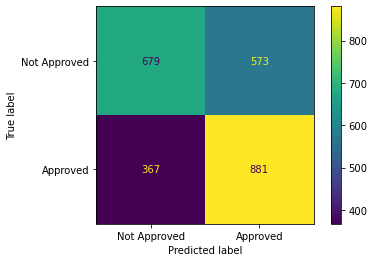

In [ ]:
plot_confusion_matrix(optimal_params, X_test_scaled, y_test, values_format ='d', display_labels = ['Not Approved','Approved'])

In [ ]:
#prediction
y_pred = optimal_params.predict(X_test)
report = classification_report(y_pred,y_test)
print(report)

/Users/amarjotsinghlohia/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      0.50      0.67      2499
           1       0.00      0.00      0.00         1

    accuracy                           0.50      2500
   macro avg       0.50      0.25      0.33      2500
weighted avg       1.00      0.50      0.67      2500

